<a href="https://colab.research.google.com/github/psousabr/MachineLearning/blob/main/DONUTS_Lab_Redu%C3%A7%C3%A3o_de_Dimensionalidade_em_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Desafio

  Este desafio consiste em implementar em Python uma função que transforma uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), preto e branco, não é permitida a utilização de bibliotecas python já estabelecidas que realizão esta mesma função.

   O resultado do algoritimo implementado será conforme a figura, que mostra lado a lado a foto digitalizada "Lena":
  
  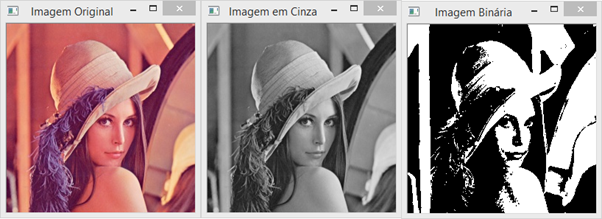

# Importa a imagem que terá sua dimensionalidade reduzida.

Image downloaded as: donuts.png


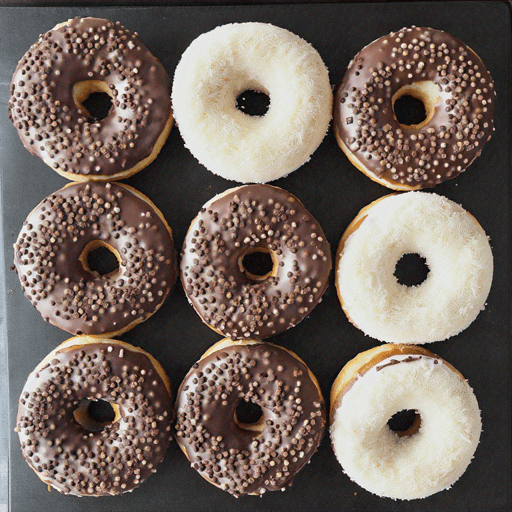

In [17]:
# Step 1: Download the  image and read it into raw bytes
import urllib.request

#url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
url = "https://www.oitedi.com.br/_next/image?url=https%3A%2F%2Ftedi-production.s3.amazonaws.com%2Fcooking_recipes%2Ffood_description%2F3529e5d501cffafc8ffcb36b2326016dfe7d648b.png&w=1080&q=70"
image_path = "donuts.png"
urllib.request.urlretrieve(url, image_path)

print("Image downloaded as:", image_path)

from PIL import Image
from IPython.display import display

# Armazena a imagem como 'img' e a exibe
img = Image.open(image_path).convert("RGB")
display(img)

# Convertendo a imagem:
  Função para converter imagem da extenção PNG em uma matriz 3D que representa os pixels desta imagem, sendo a posição do pixel e os canais de cor(outra matriz 3D), ou seja [ posX, posY, [R,G,B]]

In [18]:
def img_matriz_RGB(img):
  # dimensiona a imagem
  largura, altura = img.size

  # extrai as informações da imagem em forma de uma matriz 3D
  matriz_pixel = []
  for y in range(altura):
    row = []
    for x in range(largura):
      r,g,b = img.getpixel((x,y)) # extrai os valores de RGB no pixel (x,y)
      row.append([r,g,b])
    matriz_pixel.append(row)

  print(f"tamanho da imagem: {largura} x {altura}")
  print(f"Pixel exemplo: [0][0]: ", matriz_pixel[0][0]) # imprime os valores do pixel localizado no canto superior esquerdo
  return matriz_pixel

Altenativamente definimos também uma função onde será realizada a conversão da imagem da extenção PNG em uma matriz 3D que representa os pixels desta imagem, sendo a posição do pixel e o nível de cinza, ou seja [ posX, posY, cinza]

In [19]:
def img_matriz_gray(img):
  # dimensiona a imagem
  largura, altura = img.size

  # extrai as informações da imagem em forma de uma matriz 3D
  matriz_pixel = []
  for y in range(altura):
    row = []
    for x in range(largura):
      row.append(img.getpixel((x,y))) # extrai os valores de RGB no pixel (x,y)
    matriz_pixel.append(row)
  print(f"tamanho da imagem: {largura} x {altura}")
  print(f"Pixel exemplo: [0][0]: ", matriz_pixel[0][0]) # imprime o valor do pixel localizado no canto superior esquerdo
  return matriz_pixel

## Converte uma imagem colorida em uma imagem em tons de cinza

In [20]:
# grayscale = 0.299*R + 0.587*G + 0.114*B

def RGB_to_grayscale(imagem): # recebe apenas a matriz RGB que compoe a imagem, converte em valores de cinza e retorna a imagem reconstruida
  matriz = img_matriz_RGB(imagem)
  h = len(matriz)
  l = len(matriz[0])

  img = Image.new("L", (l, h))

  grayscale = []
  for y in range(h):
    for x in range(l):
      r,g,b = matriz[y][x]
      grayscale.append(int(0.299*r + 0.587*g + 0.114*b))
  print(f"Pixel exemplo: [0][0]: ", grayscale[0]) # imprime o valor do pixel localizado no canto superior esquerdo
  img.putdata(grayscale)
  return img

tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  [95, 86, 84]
Pixel exemplo: [0][0]:  88


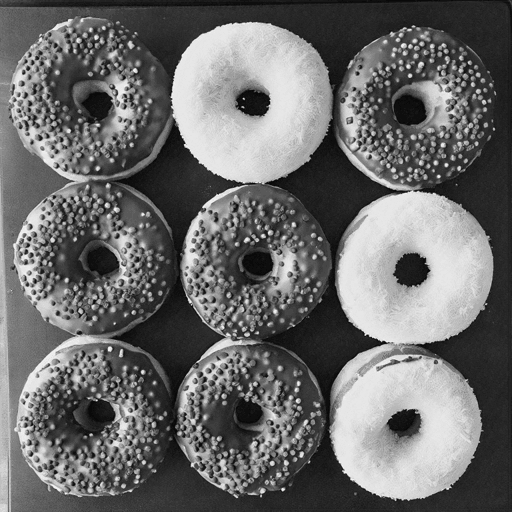

In [21]:
display(RGB_to_grayscale(img))

## Converte uma imagem colorida em uma imagem binaria (preto e branco)

In [22]:
def RGB_to_binary(imagem): # recebe apenas a matriz RGB que compoe a imagem, converte em valores binarios e retorna a imagem reconstruida
  matriz = img_matriz_RGB(imagem)
  h = len(matriz)
  l = len(matriz[0])

  img = Image.new("1", (l, h))

  bin = []
  for y in range(h):
    for x in range(l):
      r,g,b = matriz[y][x]
      if(int(0.299*r + 0.587*g + 0.114*b)>160):
        bin.append(int(1))
      else:
        bin.append(int(0))
  print(f"Pixel exemplo: [0][0]: ", bin[0]) # imprime o valor do pixel localizado no canto superior esquerdo
  img.putdata(bin)
  return img

tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  [95, 86, 84]
Pixel exemplo: [0][0]:  0


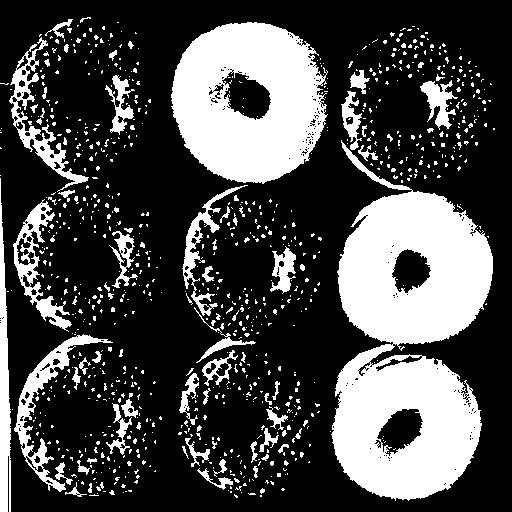

In [23]:
display(RGB_to_binary(img))

## Converte uma imagem em tons de cinza em uma imagem binaria

In [24]:
def grayscale_to_binary(imagem): # recebe uma imagem em escala de cinzas, converte em valores binarios e retorna a imagem reconstruida
  h, l = imagem.size
  matriz = img_matriz_gray(imagem)
  bin = []
  for y in range(h):
    for x in range(l):
      if(matriz[y][x]>130):
        bin.append(int(1))
      else:
        bin.append(int(0))
  img = Image.new("1", (l, h))
  print(f"Pixel exemplo: [0][0]: ", bin[0]) # imprime o valor do pixel localizado no canto superior esquerdo
  img.putdata(bin)
  return img

tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  [95, 86, 84]
Pixel exemplo: [0][0]:  88
tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  88
Pixel exemplo: [0][0]:  0


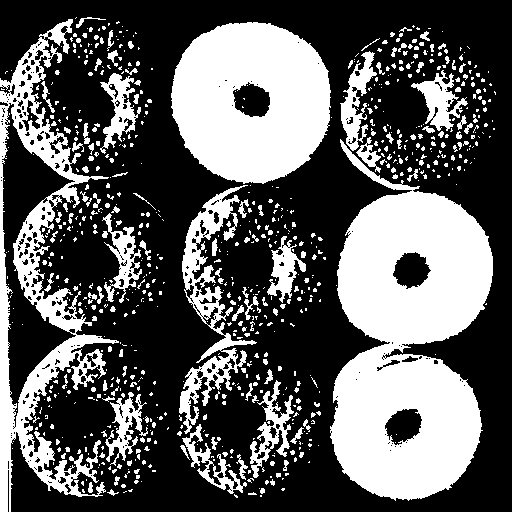

In [25]:
display(grayscale_to_binary(RGB_to_grayscale(img))) # chama inicialmente a funcao para converter a imagem em uma matriz pixel, passando-a como referencia para a funcao que converte a matriz em uma imagem em escala de cinza e depois a passa como referencia para a funcao que convertera a imagem em preto e branco e por fim exibe a imagem final

# Função completa para reducao de dimensionalidade

In [26]:
def dimensional_redu(imagem, modo):
  """
    Converte uma imagem PNG para escala de cinza ou preto/branco.

    Parametros:
        imagem (PIL.Imagem): A imagem a ser convertida.
        modo (str): conversao alvo:
                    - "gs"  → escala de cinza
                    - "bin" → binario (preto/branco)

    Returns:
        PIL.Image or None: imagem transformada, ou None se a conversao for invalida.
    """
  if modo == "gs":
    print("Conversao para escala de cinza")
    if imagem.mode == "RGB":
      return RGB_to_grayscale(imagem)
    elif imagem.mode == "L":
      print("Imagem ja em escala de cinza")
      return imagem
    else:
      print("Conversao de imagem binaria para escala de cinza nao e possivel")
      return None
  elif modo == "bin":
    print("Conversao para binario")
    if imagem.mode == "RGB":
      return RGB_to_binary(imagem)
    elif imagem.mode == "L":
      return grayscale_to_binary(imagem)
    elif imagem.mode =="1":
      print("Imagem ja em binario")
      return imagem
  else:
    print("Modo de conversao invalido")
    return None

## Exemplos de aplicação

Conversao para escala de cinza
tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  [95, 86, 84]
Pixel exemplo: [0][0]:  88


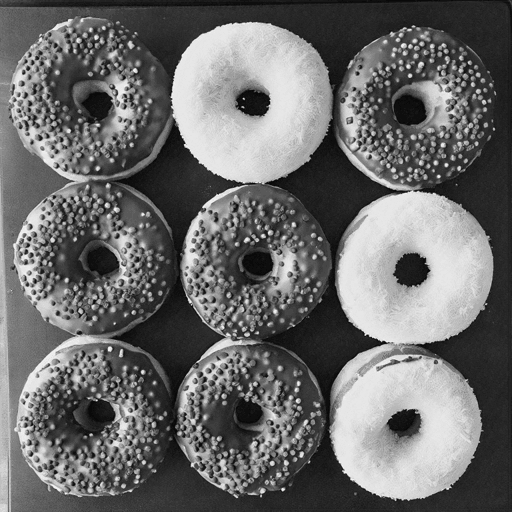

In [27]:
imagem_gs = (dimensional_redu(img, "gs"))
display(imagem_gs)

Conversao para binario
tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  [95, 86, 84]
Pixel exemplo: [0][0]:  0


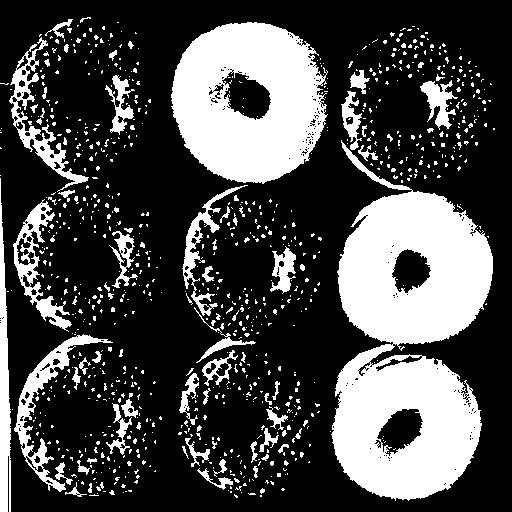

In [28]:
display(dimensional_redu(img, "bin"))

Conversao para binario
tamanho da imagem: 512 x 512
Pixel exemplo: [0][0]:  88
Pixel exemplo: [0][0]:  0


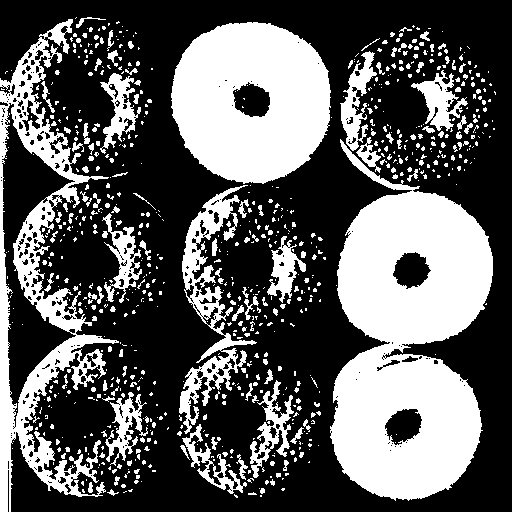

In [29]:
display(dimensional_redu(imagem_gs, "bin"))